Stock price prediction using LSTM:
1. Collected day-wise past stock prices of selected companies and performed data discretization, data transformation, data cleaning and data integration.

2. Feature Selection is performed and the NN model is trained by feeding the training dataset. The model is initiated using random weights and biases. and sequential input layer followed by 3 LSTM layers and then a dense layer with activation.

3. The output layer again consists of a dense layer with a linear activation function and the output is compared with the target values and error difference is calculated. The Backpropagation algorithm is used to minimize the error difference by adjusting the biases and weights of the neural network.

Steps in the LSTM Model:
1. Data Collection → Load stock price data (e.g., from Yahoo Finance).
2. Data Preprocessing
3. Cleaning missing values
4. Feature selection & scaling
5. Creating sequential input-output pairs for time series forecasting

Model Architecture:
1. 3 LSTM Layers
2. 1 Dense Layer (with activation function)
3. Output Layer (linear activation function)

Training with Backpropagation:
1. Loss function: Mean Squared Error (MSE)
2. Optimizer: Adam
3. Adjusts weights & biases using Backpropagation
4. Prediction & Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf  # To get stock data




In [2]:
# 1️⃣ Load Stock Price Data
def load_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data[['Close']]



In [3]:
# 2️⃣ Preprocessing: Normalization & Data Transformation
def preprocess_data(data, time_step=60):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(data)

    X, Y = [], []
    for i in range(len(scaled_data) - time_step):
        X.append(scaled_data[i:i+time_step])
        Y.append(scaled_data[i+time_step])

    return np.array(X), np.array(Y), scaler



In [4]:
# 3️⃣ Define LSTM Model Architecture
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=True),
        LSTM(50),
        Dense(25, activation="relu"),
        Dense(1, activation="linear")  # Output Layer
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model



[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.1692 - val_loss: 0.0190
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0073 - val_loss: 0.0121
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0037 - val_loss: 0.0084
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0024 - val_loss: 0.0053
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - 

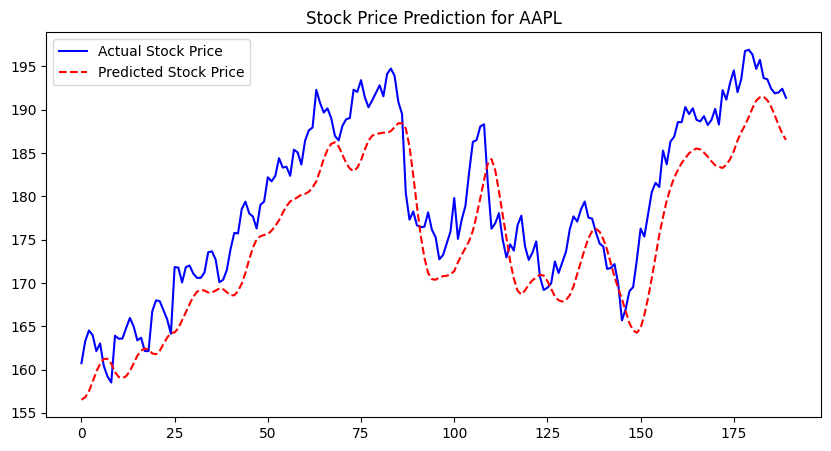

In [5]:
# 4️⃣ Train & Predict
def train_and_predict(stock_symbol, start_date, end_date, future_days=30):
    # Load Data
    data = load_data(stock_symbol, start_date, end_date)


    # Preprocess Data
    X, Y, scaler = preprocess_data(data.values)

    # Train-Test Split (80% Train, 20% Test)
    train_size = int(len(X) * 0.8)
    X_train, Y_train = X[:train_size], Y[:train_size]
    X_test, Y_test = X[train_size:], Y[train_size:]

    # Build & Train Model
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

    # Predict
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # Convert back to original scale
    actual_values = scaler.inverse_transform(Y_test.reshape(-1, 1))

    # 📈 Plot Results
    plt.figure(figsize=(10,5))
    plt.plot(actual_values, color="blue", label="Actual Stock Price")
    plt.plot(predictions, color="red", linestyle="dashed", label="Predicted Stock Price")
    plt.legend()
    plt.title(f"Stock Price Prediction for {stock_symbol}")
    plt.show()

# 📌 Example Usage
train_and_predict(stock_symbol="AAPL", start_date="2020-01-01", end_date="2024-01-01")

Key Features of This Implementation:
1. Uses Yahoo Finance API (yfinance) to fetch real stock prices
2. Performs Data Normalization using MinMaxScaler
3. Implements a Deep LSTM Model with 3 LSTM layers
4. Uses Adam Optimizer & MSE Loss Function for backpropagation
5. Plots Predictions vs. Actual Values

Hyperparameter Tuning for LSTM
To improve accuracy, fine-tune:
1. Number of neurons → Try 50, 100, or 200 per LSTM layer.
2. Batch size → Test 16, 32, or 64.
1. Epochs → Start with 50, then increase if underfitting.
4. Optimizer → Try Adam, RMSprop, or SGD.

📌 Solution: Use Grid Search or Bayesian Optimization with Keras Tuner:

In [6]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [9]:
from keras_tuner import RandomSearch

def build_tuned_lstm(hp):
    model = Sequential([
        LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=True, input_shape=(60, 1)),
        Dropout(hp.Choice('dropout', [0.2, 0.3, 0.4])),
        LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=True),
        LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50)),
        Dense(25, activation="relu"),
        Dense(1, activation="linear")
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
# 4️⃣ Train & Predict and Prepare Data for Tuning
def prepare_data_for_tuning(stock_symbol, start_date, end_date):
    # Load Data
    data = load_data(stock_symbol, start_date, end_date)

    # Preprocess Data
    X, Y, scaler = preprocess_data(data.values)

    # Train-Test Split (80% Train, 20% Test)
    train_size = int(len(X) * 0.8)
    X_train, Y_train = X[:train_size], Y[:train_size]
    X_test, Y_test = X[train_size:], Y[train_size:]

    return X_train, Y_train, X_test, Y_test

# Call prepare_data_for_tuning to create X_train, Y_train, X_test, Y_test
X_train, Y_train, X_test, Y_test = prepare_data_for_tuning(stock_symbol="AAPL", start_date="2020-01-01", end_date="2024-01-01")

tuner = RandomSearch(build_tuned_lstm, objective='val_loss', max_trials=5, executions_per_trial=2)
tuner.search(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


Trial 5 Complete [00h 07m 52s]
val_loss: 0.0009647062979638577

Best val_loss So Far: 0.0009647062979638577
Total elapsed time: 00h 21m 47s


In [11]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(60, 5)),  # 5 Features
    Dropout(0.3),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(100),
    Dense(50, activation="relu"),
    Dense(1, activation="linear")
])


Train on Multiple Features (Open, High, Low, Close, Volume)
Instead of using only Close prices, include all stock attributes:

1. Features: ['Open', 'High', 'Low', 'Close', 'Volume']

Modify preprocessing to scale all features:

In [15]:
# 1️⃣ Load Stock Price Data
def load_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    # Return all relevant columns instead of just 'Close'
    return stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
# 4️⃣ Train & Predict and Prepare Data for Tuning
def prepare_data_for_tuning(stock_symbol, start_date, end_date):
    # Load Data
    data = load_data(stock_symbol, start_date, end_date) # Call load_data to define data

    # Preprocess Data
    X, Y, scaler = preprocess_data(data.values)

    # Train-Test Split (80% Train, 20% Test)
    train_size = int(len(X) * 0.8)
    X_train, Y_train = X[:train_size], Y[:train_size]
    X_test, Y_test = X[train_size:], Y[train_size:]

    return X_train, Y_train, X_test, Y_test, data # Return data

# Call prepare_data_for_tuning to get X_train, Y_train, X_test, Y_test and data
X_train, Y_train, X_test, Y_test, data = prepare_data_for_tuning(stock_symbol="AAPL", start_date="2020-01-01", end_date="2024-01-01")

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']]) # Use the defined data


[*********************100%***********************]  1 of 1 completed


In [17]:
#Modify LSTM Input Shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 5))  # 5 Features


Convert Model to TensorFlow Lite (TFLite) for Mobile Apps
Convert the trained model to TFLite for deployment on Android/iOS.

In [19]:
import tensorflow as tf

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_enable_resource_variables = True # Enable resource variables
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()

# Save the model
with open("stock_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpt313f3sk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60, 5), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135840435108176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840435108752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840435108944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840435108560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840335852176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840335851408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840335852752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840335849296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840335849872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840335850832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135840335850256: 

In [29]:
!pip install flask

In [31]:
!python -m flask --version

Python 3.11.11
Flask 3.1.0
Werkzeug 3.1.3


In [32]:
mkdir flask_project && cd flask_project

In [1]:
python -m venv venv

SyntaxError: invalid syntax (<ipython-input-1-8a2850dee4c1>, line 1)

In [52]:
pip install flask


In [53]:
!telnet localhost 5000

/bin/bash: line 1: telnet: command not found


In [57]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, Flask is running!"

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [58]:
!python app.py

python3: can't open file '/content/app.py': [Errno 2] No such file or directory


Deploy as an API Using Flask
To serve real-time predictions via an API:

In [42]:
from flask import Flask, request, jsonify
import numpy as np
import tensorflow as tf

app = Flask(__name__)
model= tf.keras.models.load_model("stock_model.h5")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    X_input = np.array(data['features']).reshape(1, 60, 5)  # 5 Features
    prediction = model.predict(X_input).tolist()
    return jsonify({"prediction": prediction})

if __name__ == '__main__':
    app.run(host='0.0.0.0',port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [43]:
!curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d '{"features": [[0.3, 0.5, 0.4, 0.6, 0.2], ...]}'

curl: (7) Failed to connect to 127.0.0.1 port 5000 after 0 ms: Connection refused
